In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay


In [2]:
data = pd.read_csv("phishing_dataset.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [3]:
data.shape


(11054, 32)

In [4]:
data['class'].value_counts()

class
 1    6157
-1    4897
Name: count, dtype: int64

In [5]:
data.columns


Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [7]:
data.nunique()

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      2
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

In [8]:
data.isna().sum()

Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

In [9]:
data = data.drop(['Index'],axis = 1)

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.145468,0.989408,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


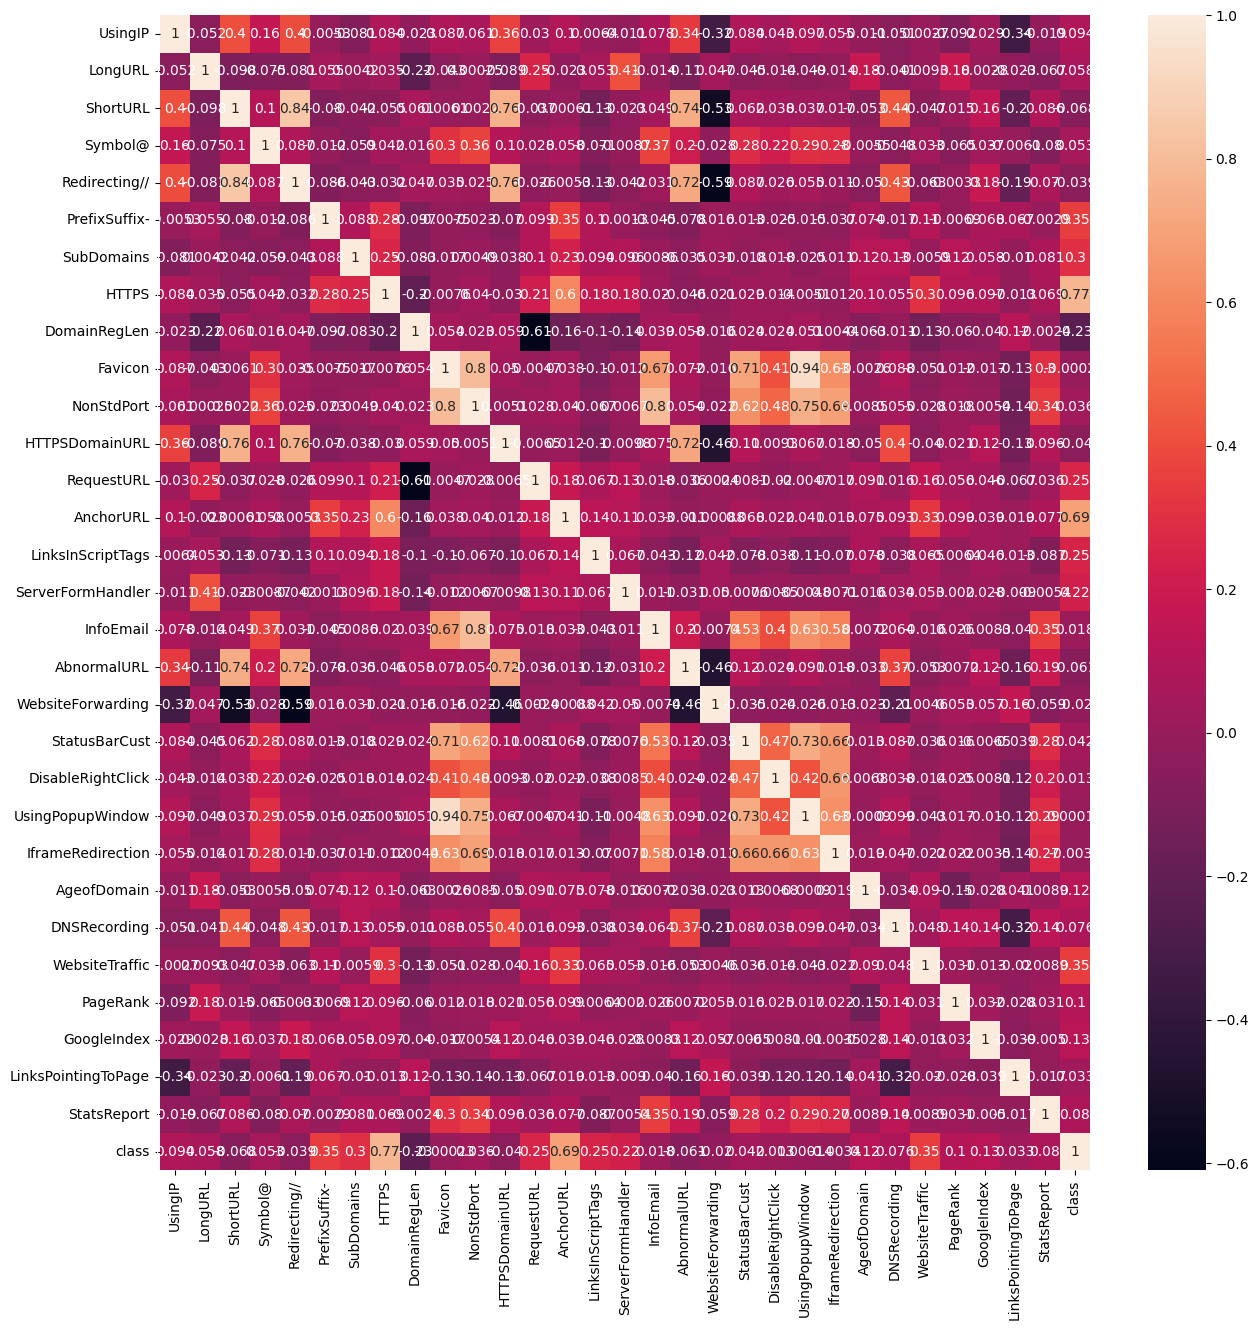

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

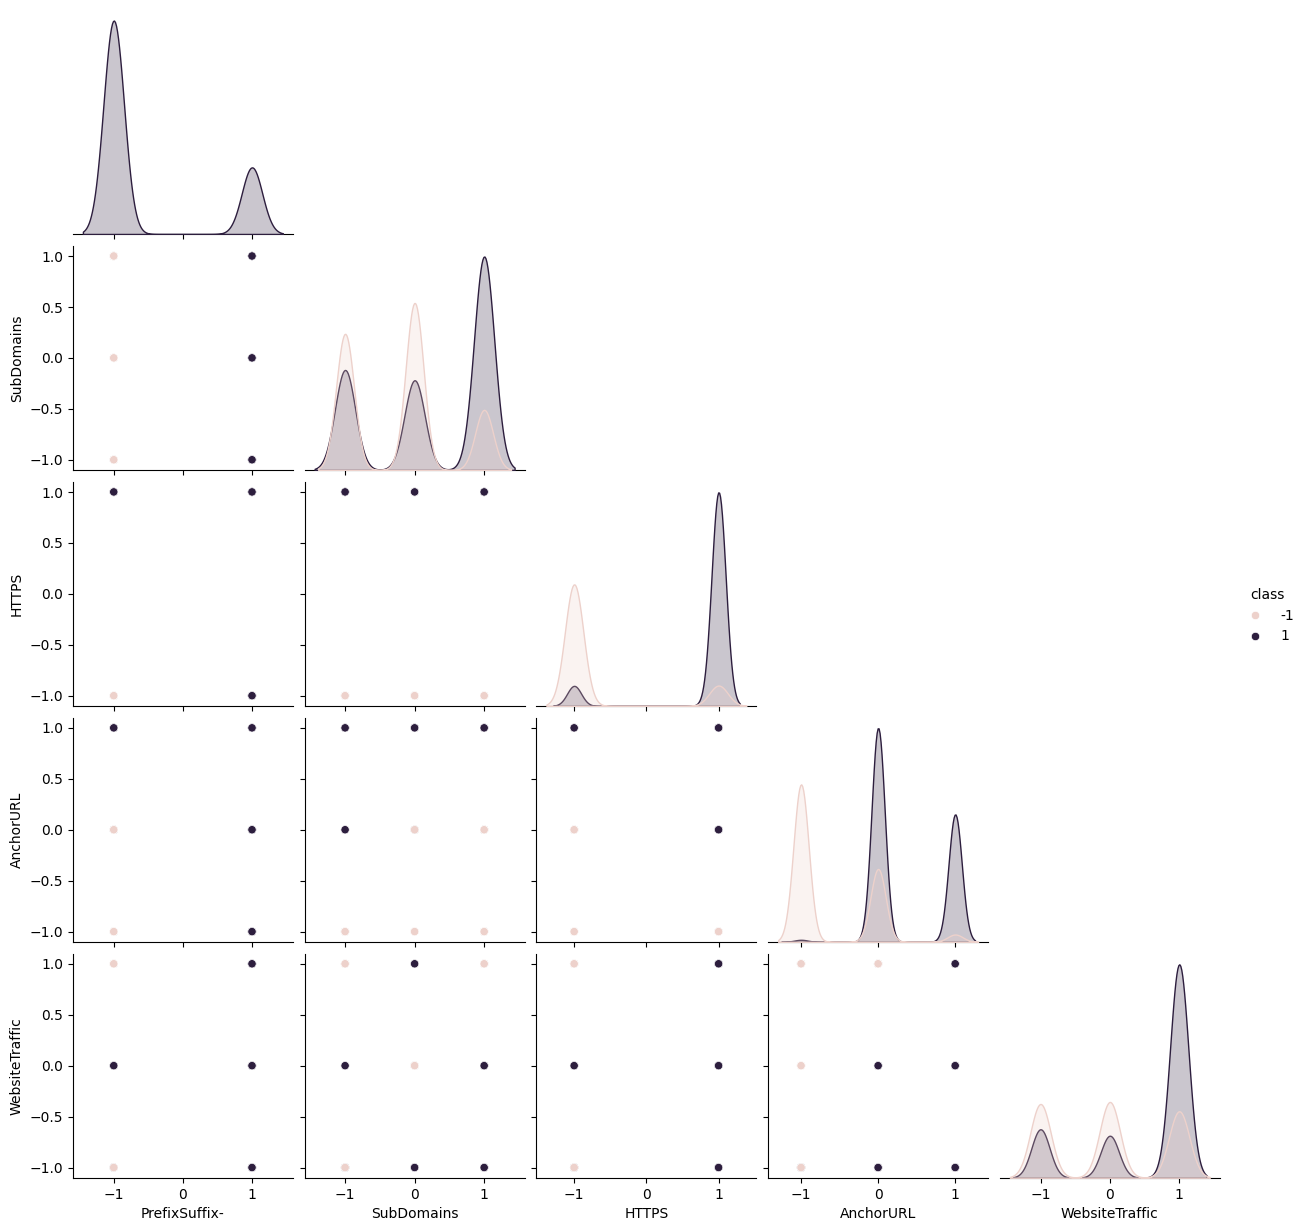

In [12]:
df = data[['PrefixSuffix-', 'SubDomains', 'HTTPS','AnchorURL','WebsiteTraffic','class']]
sns.pairplot(data = df, hue="class", corner=True);

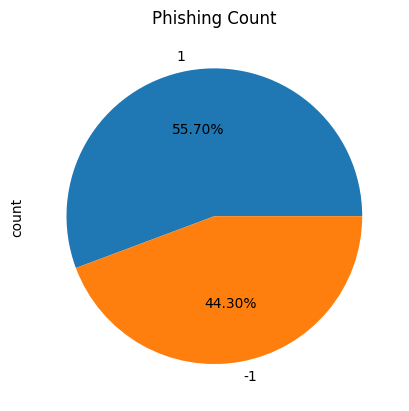

In [13]:
data['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

In [14]:
X = data.drop(["class"],axis =1)
y = data["class"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 30), (8843,), (2211, 30), (2211,))

In [55]:
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

In [17]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression


LogReg = LogisticRegression()
 
LogReg.fit(X_train,y_train)

LogisticRegression()

In [18]:
y_train_log = LogReg.predict(X_train)
y_test_log = LogReg.predict(X_test)

In [19]:
acc_train_log = metrics.accuracy_score(y_train, y_train_log)
acc_test_log = metrics.accuracy_score(y_test, y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.930
Logistic Regression : Accuracy on test Data: 0.935

Logistic Regression : f1_score on training Data: 0.938
Logistic Regression : f1_score on test Data: 0.942

Logistic Regression : Recall on training Data: 0.946
Logistic Regression : Recall on test Data: 0.955

Logistic Regression : precision on training Data: 0.930
Logistic Regression : precision on test Data: 0.931


In [20]:
print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

          -1       0.94      0.91      0.93       976
           1       0.93      0.95      0.94      1235

    accuracy                           0.93      2211
   macro avg       0.94      0.93      0.93      2211
weighted avg       0.94      0.93      0.93      2211



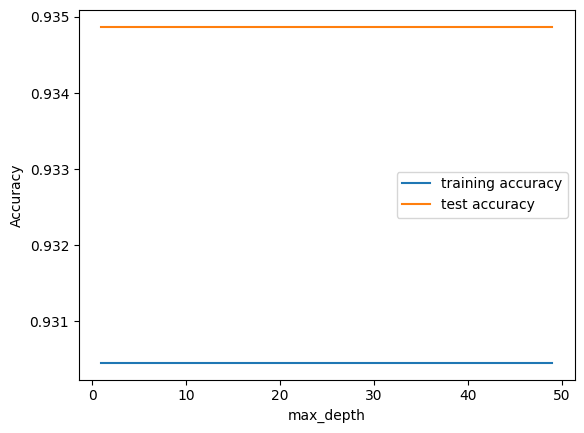

In [80]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 50
depth = range(1,50)
for n in depth:
    LogReg = LogisticRegression()

    LogReg.fit(X_train,y_train)
    # Record training set accuracy
    training_accuracy.append(LogReg.score(X_train, y_train))
    test_accuracy.append(LogReg.score(X_test, y_test))


# Plotting the training & testing accuracy for max_depth from 1 to 50
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

In [56]:
storeResults('Logistic Regression', acc_test_log, f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(np.array(X_train),y_train)

KNeighborsClassifier(n_neighbors=1)

In [23]:
y_train_knn = KNN.predict(np.array(X_train))
y_test_knn = KNN.predict(np.array(X_test))

In [24]:
acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 0.988
K-Nearest Neighbors : Accuracy on test Data: 0.959

K-Nearest Neighbors : f1_score on training Data: 0.990
K-Nearest Neighbors : f1_score on test Data: 0.963

K-Nearest Neighborsn : Recall on training Data: 0.990
Logistic Regression : Recall on test Data: 0.964

K-Nearest Neighbors : precision on training Data: 0.989
K-Nearest Neighbors : precision on test Data: 0.962


In [25]:
print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       976
           1       0.96      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



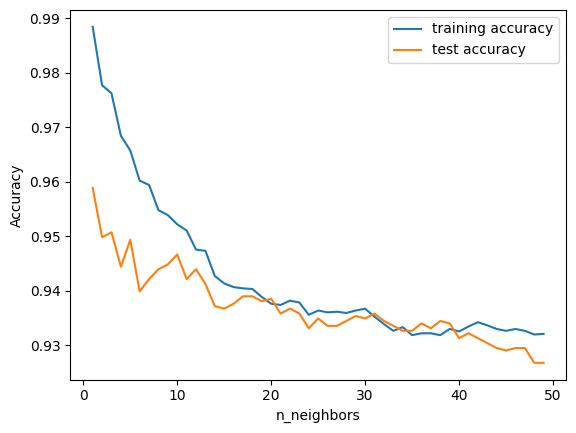

In [71]:
training_accuracy = []
test_accuracy = []
depth = range(1,50)
for n in depth:
    KNN = KNeighborsClassifier(n_neighbors=n)

    KNN.fit(np.array(X_train), y_train)
    training_accuracy.append(KNN.score(np.array(X_train), y_train))
    test_accuracy.append(KNN.score(np.array(X_test), y_test))
    
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend()

In [62]:
storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

SVC = GridSearchCV(SVC(), param_grid)


SVC.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [29]:
y_train_svc = SVC.predict(X_train)
y_test_svc = SVC.predict(X_test)

In [30]:
acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.969
Support Vector Machine : Accuracy on test Data: 0.963

Support Vector Machine : f1_score on training Data: 0.972
Support Vector Machine : f1_score on test Data: 0.967

Support Vector Machine : Recall on training Data: 0.978
Support Vector Machine : Recall on test Data: 0.977

Support Vector Machine : precision on training Data: 0.966
Support Vector Machine : precision on test Data: 0.958


In [31]:
print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.97      0.95      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [78]:
training_accuracy = []
test_accuracy = []
depth = range(1, 50)  # يمكن تعديل هذه المجموعة لتناسب المعاملات الفائقة المطلوبة

for n in depth:
    svc_grid = GridSearchCV(SVC(), param_grid, cv=5)
    svc_grid.fit(X_train, y_train)
    training_accuracy.append(svc_grid.score(X_train, y_train))
    test_accuracy.append(svc_grid.score(X_test, y_test))

# رسم الدقة
plt.plot(depth, training_accuracy, label="Training Accuracy")
plt.plot(depth, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Parameter range (depth)")
plt.legend()
plt.show()

TypeError: 'GridSearchCV' object is not callable

In [61]:
storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc)

In [33]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model 
DT = DecisionTreeClassifier(max_depth=30)

# Fit the model 
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [34]:
y_train_tree = DT.predict(X_train)
y_test_tree = DT.predict(X_test)

In [35]:
acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 0.991
Decision Tree : Accuracy on test Data: 0.958

Decision Tree : f1_score on training Data: 0.992
Decision Tree : f1_score on test Data: 0.962

Decision Tree : Recall on training Data: 0.991
Decision Tree : Recall on test Data: 0.959

Decision Tree : precision on training Data: 0.992
Decision Tree : precision on test Data: 0.966


In [36]:
print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

          -1       0.95      0.96      0.95       976
           1       0.97      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



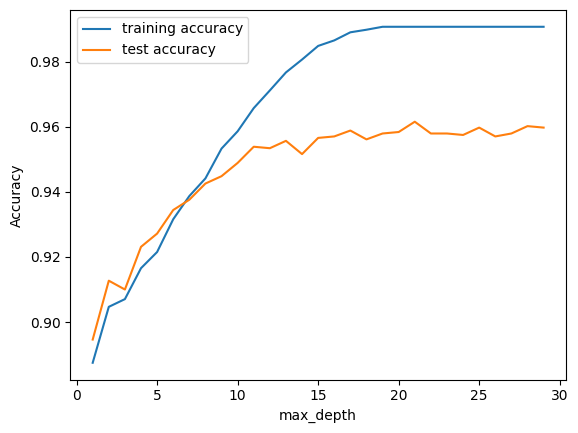

In [37]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # Record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # Record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

# Plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

In [60]:
storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
RF = RandomForestClassifier(n_estimators=10)

# Fit the model 
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [40]:
y_train_forest = RF.predict(X_train)
y_test_forest = RF.predict(X_test)

In [41]:
acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.990
Random Forest : Accuracy on test Data: 0.962

Random Forest : f1_score on training Data: 0.991
Random Forest : f1_score on test Data: 0.966

Random Forest : Recall on training Data: 0.993
Random Forest : Recall on test Data: 0.969

Random Forest : precision on training Data: 0.990
Random Forest : precision on test Data: 0.966


In [42]:
print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

          -1       0.96      0.95      0.96       976
           1       0.96      0.97      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



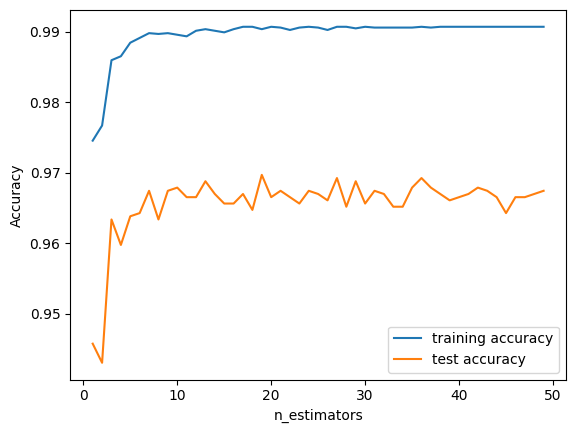

In [82]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 50
depth = range(1,50)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # Record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # Record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend()

In [59]:
storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the model
GBC = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# Fit the model 
GBC.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [46]:
y_train_gbc = GBC.predict(X_train)
y_test_gbc = GBC.predict(X_test)

In [47]:
y_test_gbc

array([-1,  1,  1, ...,  1,  1,  1], dtype=int64)

In [48]:
acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.987
Gradient Boosting Classifier : Accuracy on test Data: 0.968

Gradient Boosting Classifier : f1_score on training Data: 0.988
Gradient Boosting Classifier : f1_score on test Data: 0.972

Gradient Boosting Classifier : Recall on training Data: 0.992
Gradient Boosting Classifier : Recall on test Data: 0.981

Gradient Boosting Classifier : precision on training Data: 0.985
Gradient Boosting Classifier : precision on test Data: 0.963


In [49]:
print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.97      0.95      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



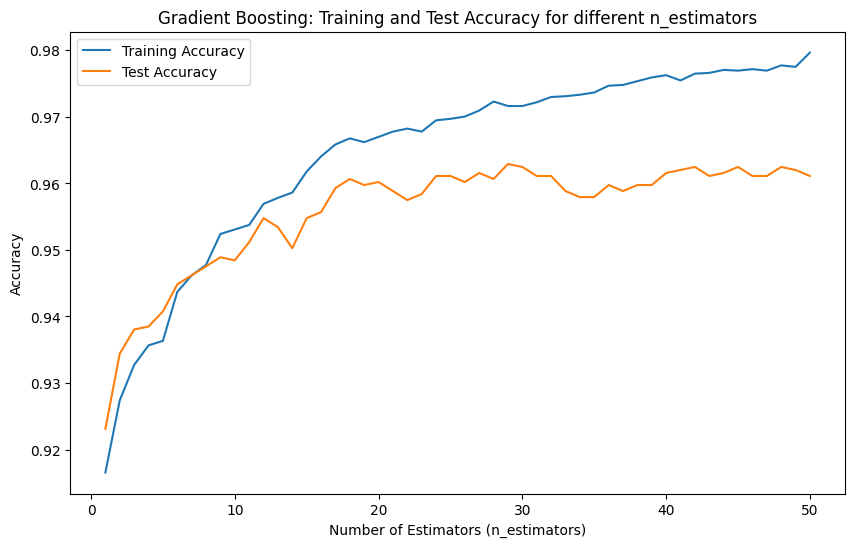

In [85]:
training_accuracy = []
test_accuracy = []
n_estimators_range = range(1, 50)  # تجربة n_estimators من 1 إلى 50

for n in n_estimators_range:
    GBC_test = GradientBoostingClassifier(max_depth=4, learning_rate=0.7, n_estimators=n)
    GBC_test.fit(X_train, y_train)
    
    # تسجيل دقة مجموعة التدريب
    training_accuracy.append(GBC_test.score(X_train, y_train))
    # تسجيل دقة مجموعة الاختبار
    test_accuracy.append(GBC_test.score(X_test, y_test))

# رسم دقة التدريب والاختبار مقابل n_estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, training_accuracy, label="Training Accuracy")
plt.plot(n_estimators_range, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("Number of Estimators (n_estimators)")
plt.legend()
plt.title("Gradient Boosting: Training and Test Accuracy for different n_estimators")
plt.show()

In [58]:

storeResults('Gradient Boosting Classifier', acc_test_gbc, f1_score_test_gbc,
             recall_score_train_gbc, precision_score_train_gbc)



In [51]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

mlp = MLPClassifier()

mlp.fit(X_train,y_train)

MLPClassifier()

In [52]:
y_train_mlp = mlp.predict(X_train)
y_test_mlp = mlp.predict(X_test)

In [53]:
acc_train_mlp  = metrics.accuracy_score(y_train,y_train_mlp)
acc_test_mlp = metrics.accuracy_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multi-layer Perceptron : Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print()

f1_score_train_mlp = metrics.f1_score(y_train,y_train_mlp)
f1_score_test_mlp = metrics.f1_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : f1_score on training Data: {:.3f}".format(f1_score_train_mlp))
print("Multi-layer Perceptron : f1_score on test Data: {:.3f}".format(f1_score_train_mlp))
print()

recall_score_train_mlp = metrics.recall_score(y_train,y_train_mlp)
recall_score_test_mlp = metrics.recall_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Recall on training Data: {:.3f}".format(recall_score_train_mlp))
print("Multi-layer Perceptron : Recall on test Data: {:.3f}".format(recall_score_test_mlp))
print()

precision_score_train_mlp = metrics.precision_score(y_train,y_train_mlp)
precision_score_test_mlp = metrics.precision_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : precision on training Data: {:.3f}".format(precision_score_train_mlp))
print("Multi-layer Perceptron : precision on test Data: {:.3f}".format(precision_score_test_mlp))

Multi-layer Perceptron : Accuracy on training Data: 0.986
Multi-layer Perceptron : Accuracy on test Data: 0.968

Multi-layer Perceptron : f1_score on training Data: 0.988
Multi-layer Perceptron : f1_score on test Data: 0.988

Multi-layer Perceptron : Recall on training Data: 0.996
Multi-layer Perceptron : Recall on test Data: 0.985

Multi-layer Perceptron : precision on training Data: 0.980
Multi-layer Perceptron : precision on test Data: 0.958


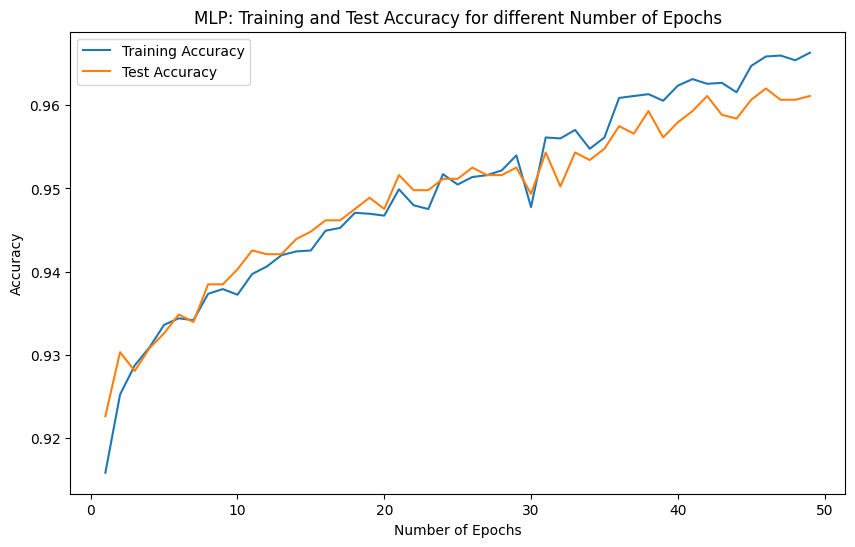

In [86]:
training_accuracy = []
test_accuracy = []
epochs_range = range(1, 50)  # تجربة عدد التكرارات (epochs) من 1 إلى 50

for n in epochs_range:
    # تهيئة النموذج مع عدد مختلف من التكرارات
    MLP_test = MLPClassifier(max_iter=n, random_state=42)
    MLP_test.fit(X_train, y_train)
    
    # تسجيل دقة مجموعة التدريب
    training_accuracy.append(MLP_test.score(X_train, y_train))
    # تسجيل دقة مجموعة الاختبار
    test_accuracy.append(MLP_test.score(X_test, y_test))

# رسم دقة التدريب والاختبار مقابل عدد التكرارات
plt.figure(figsize=(10, 6))
plt.plot(epochs_range, training_accuracy, label="Training Accuracy")
plt.plot(epochs_range, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("Number of Epochs")
plt.legend()
plt.title("MLP: Training and Test Accuracy for different Number of Epochs")
plt.show()

In [57]:
storeResults('Multi-layer Perceptron',acc_test_mlp,f1_score_test_mlp,
               recall_score_train_mlp,precision_score_train_mlp)

XGBoost Classifier : Accuracy on training Data: 1.000
XGBoost Classifier : Accuracy on test Data: 1.000

XGBoost Classifier : f1_score on training Data: 1.000
XGBoost Classifier : f1_score on test Data: 1.000

XGBoost Classifier : Recall on training Data: 1.000
XGBoost Classifier : Recall on test Data: 1.000

XGBoost Classifier : Precision on training Data: 1.000
XGBoost Classifier : Precision on test Data: 1.000


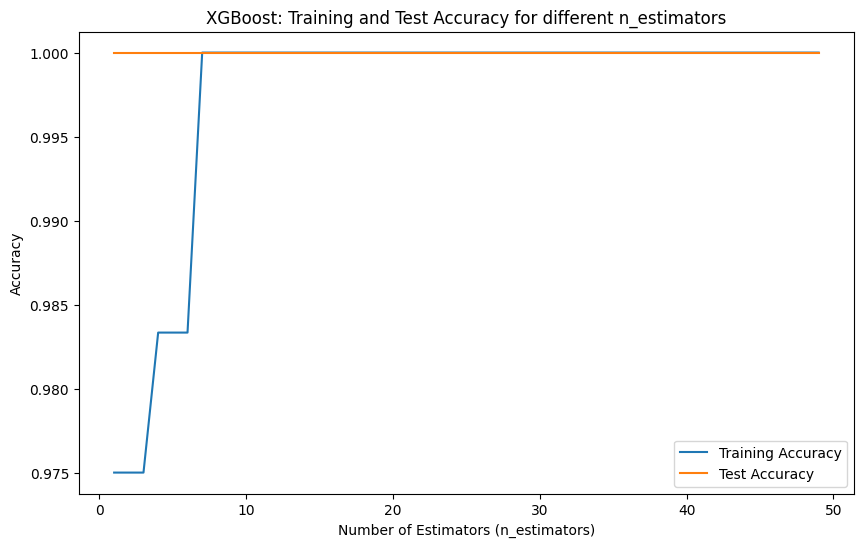

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import metrics

# تحميل البيانات وتقسيمها
'''iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)'''

# تهيئة النموذج
xgb = XGBClassifier(max_depth=4, learning_rate=0.7, n_estimators=50, use_label_encoder=False, eval_metric='mlogloss')

# تدريب النموذج
xgb.fit(X_train, y_train)
y_train_xgb = xgb.predict(X_train)
y_test_xgb = xgb.predict(X_test)

# طباعة الدقة
acc_train_xgb = metrics.accuracy_score(y_train, y_train_xgb)
acc_test_xgb = metrics.accuracy_score(y_test, y_test_xgb)
print("XGBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print()

f1_score_train_xgb = metrics.f1_score(y_train, y_train_xgb, average='weighted')
f1_score_test_xgb = metrics.f1_score(y_test, y_test_xgb, average='weighted')
print("XGBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_xgb))
print("XGBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_xgb))
print()

recall_score_train_xgb = metrics.recall_score(y_train, y_train_xgb, average='weighted')
recall_score_test_xgb = metrics.recall_score(y_test, y_test_xgb, average='weighted')
print("XGBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_xgb))
print("XGBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_test_xgb))
print()

precision_score_train_xgb = metrics.precision_score(y_train, y_train_xgb, average='weighted')
precision_score_test_xgb = metrics.precision_score(y_test, y_test_xgb, average='weighted')
print("XGBoost Classifier : Precision on training Data: {:.3f}".format(precision_score_train_xgb))
print("XGBoost Classifier : Precision on test Data: {:.3f}".format(precision_score_test_xgb))

# تحليل الأداء مع عدد مختلف من التكرارات
training_accuracy = []
test_accuracy = []
n_estimators_range = range(1, 50)  # تجربة n_estimators من 1 إلى 50

for n in n_estimators_range:
    xgb_test = XGBClassifier(max_depth=4, learning_rate=0.7, n_estimators=n, use_label_encoder=False, eval_metric='mlogloss')
    xgb_test.fit(X_train, y_train)
    
    # تسجيل دقة مجموعة التدريب
    training_accuracy.append(xgb_test.score(X_train, y_train))
    # تسجيل دقة مجموعة الاختبار
    test_accuracy.append(xgb_test.score(X_test, y_test))

# رسم دقة التدريب والاختبار مقابل عدد التكرارات
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, training_accuracy, label="Training Accuracy")
plt.plot(n_estimators_range, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("Number of Estimators (n_estimators)")
plt.legend()
plt.title("XGBoost: Training and Test Accuracy for different n_estimators")
plt.show()


XGBoost Classifier : Accuracy on training Data: 1.000
XGBoost Classifier : Accuracy on test Data: 1.000
XGBoost Classifier : f1_score on training Data: 1.000
XGBoost Classifier : f1_score on test Data: 1.000
XGBoost Classifier : Recall on training Data: 1.000
XGBoost Classifier : Recall on test Data: 1.000
XGBoost Classifier : Precision on training Data: 1.000
XGBoost Classifier : Precision on test Data: 1.000


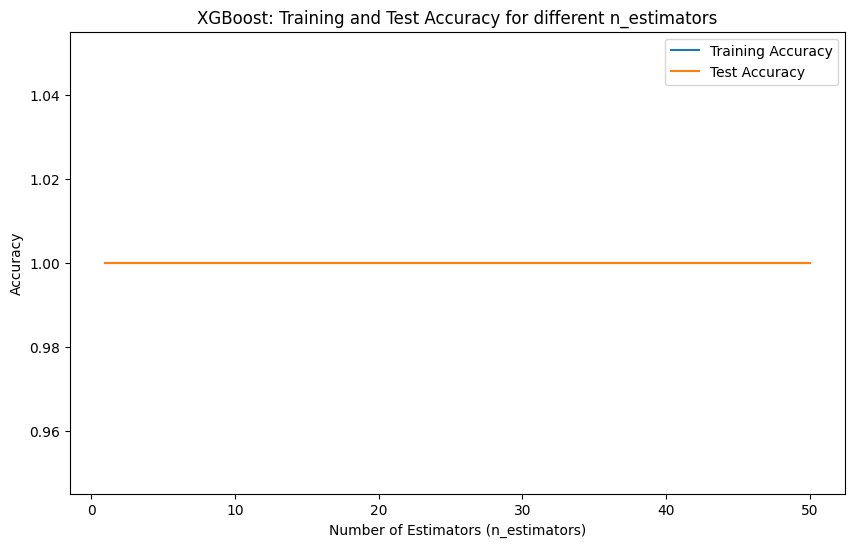

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import metrics

# تحميل البيانات وتقسيمها
'''iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)'''

# تهيئة النموذج باستخدام الإعدادات الافتراضية
xgb = XGBClassifier()

# تدريب النموذج
xgb.fit(X_train, y_train)
y_train_xgb = xgb.predict(X_train)
y_test_xgb = xgb.predict(X_test)

# حساب الدقة
acc_train_xgb = metrics.accuracy_score(y_train, y_train_xgb)
acc_test_xgb = metrics.accuracy_score(y_test, y_test_xgb)
print("XGBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

# تحليل الأداء
f1_score_train_xgb = metrics.f1_score(y_train, y_train_xgb, average='weighted')
f1_score_test_xgb = metrics.f1_score(y_test, y_test_xgb, average='weighted')
print("XGBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_xgb))
print("XGBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_xgb))

recall_score_train_xgb = metrics.recall_score(y_train, y_train_xgb, average='weighted')
recall_score_test_xgb = metrics.recall_score(y_test, y_test_xgb, average='weighted')
print("XGBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_xgb))
print("XGBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_test_xgb))

precision_score_train_xgb = metrics.precision_score(y_train, y_train_xgb, average='weighted')
precision_score_test_xgb = metrics.precision_score(y_test, y_test_xgb, average='weighted')
print("XGBoost Classifier : Precision on training Data: {:.3f}".format(precision_score_train_xgb))
print("XGBoost Classifier : Precision on test Data: {:.3f}".format(precision_score_test_xgb))

# تحليل الأداء مع عدد مختلف من التكرارات
training_accuracy = []
test_accuracy = []
n_estimators_range = range(1, 51)  # تجربة n_estimators من 1 إلى 50

for n in n_estimators_range:
    xgb_test = XGBClassifier()
    xgb_test.fit(X_train, y_train)
    
    # تسجيل دقة مجموعة التدريب
    training_accuracy.append(xgb_test.score(X_train, y_train))
    # تسجيل دقة مجموعة الاختبار
    test_accuracy.append(xgb_test.score(X_test, y_test))

# رسم دقة التدريب والاختبار مقابل عدد التكرارات
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, training_accuracy, label="Training Accuracy")
plt.plot(n_estimators_range, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("Number of Estimators (n_estimators)")
plt.legend()
plt.title("XGBoost: Training and Test Accuracy for different n_estimators")
plt.show()


In [92]:
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [93]:
accuracy

[0.935, 0.968, 0.968, 0.962, 0.958, 0.963, 0.959]

In [94]:
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.935,0.942,0.946,0.930
1,Multi-layer Perceptron,0.968,0.972,0.996,0.980
2,Gradient Boosting Classifier,0.968,0.972,0.992,0.985
3,Random Forest,0.962,0.966,0.993,0.990
4,Decision Tree,0.958,0.962,0.991,0.992
5,Support Vector Machine,0.963,0.967,0.978,0.966
6,K-Nearest Neighbors,0.959,0.963,0.990,0.989


In [66]:
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [67]:
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Multi-layer Perceptron,0.968,0.972,0.996,0.980
1,Gradient Boosting Classifier,0.968,0.972,0.992,0.985
2,Support Vector Machine,0.963,0.967,0.978,0.966
3,Random Forest,0.962,0.966,0.993,0.990
4,K-Nearest Neighbors,0.959,0.963,0.990,0.989
5,Decision Tree,0.958,0.962,0.991,0.992
6,Logistic Regression,0.935,0.942,0.946,0.930


In [ ]:
joblib.dump(GBC, 'model_Gradient Boosting Classifier.pkl')

In [ ]:
loaded_model = joblib.load('model_Gradient Boosting Classifier.pkl')
loaded_model